### Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

In [225]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
%config IPCompleter.greedy=True

In [226]:
#importing dataset
df = pd.read_csv('C:/Python/Python_Upgrad/LinearRegression/CarPrice_Assignment.csv')

##### <font color='red'>Data Preprocessing</font>

In [227]:
#Handling missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

##### From data set info we can see there is no missing data

In [228]:
#Checking data
pd.set_option('display.max_columns', None)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [229]:
df['CarName'] = df['CarName'].str.split(' ',expand=True)
df.rename(columns = {'CarName' : 'CarCompany'},inplace=True)
df.head(5)

,car_ID,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [230]:
#car_ID is not going to add any value in model preparation so lets drop these two columns
df.drop('car_ID',1,inplace=True)
#Taking backup of df
df_back = df
df.head(5)

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [231]:
#Checking Unique Car names
df['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

<font color = red>Here we can see few spelling mistakes of upper case lower case issues in company names extracted. Let's correct these</font>

In [232]:
df['CarCompany'] = df['CarCompany'].str.replace('maxda', 'mazda')
df['CarCompany'] = df['CarCompany'].str.replace('Nissan', 'nissan')
df['CarCompany'] = df['CarCompany'].str.replace('porcshce', 'porsche')
df['CarCompany'] = df['CarCompany'].str.replace('toyouta', 'toyota')
df['CarCompany'] = df['CarCompany'].str.replace('vokswagen', 'volkswagen')
df['CarCompany'] = df['CarCompany'].str.replace('vw', 'volkswagen')

In [233]:
df['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [234]:
#Splitting dependent and independent variables
#sns.pairplot(df)
#plt.show()

###### <font color='blue'>From the above scatter plot we can see definitely price has associations with <font color='red'>carlength,car width, curbweight, engine size, horsepower</font>. So these can be possible predictors.</font>

* <font color = red>Now lets see the association with categorical variables</font>

 1.  CarCompany
 2.  fueltype
 3.  aspiration
 4.  doornumber
 5.  carbody
 6.  drivewheel
 10.  enginelocation
 11.  enginetype
 12.  cylindernumber
 13.  fuelsystem	

In [235]:
# lets define a function to plot price across categorical variables
def plot_cat(cat_var):
    plt.figure(figsize=(150,30))
    plt.subplot(2,5,1)
    sns.boxplot(x=cat_var, y='price', data=df)
    plt.show()

In [236]:
#Car company vs price
#plot_cat('CarCompany')

In [237]:
#Car fueltype vs price
#plot_cat('fueltype')

In [238]:
#Car aspiration vs price
#plot_cat('aspiration')

In [239]:
#Car doornumber vs price
#plot_cat('doornumber')

###### <font color='blue'>From the above box plot we can see there is no fuch varience of price when door no is two or four <font color='red'>So we will no consider door no as a predictor</font>. </font>

In [240]:
#Car carbody vs price
#plot_cat('carbody')

In [241]:
#Car drivewheel vs price
#plot_cat('drivewheel')

In [242]:
#Car enginelocation vs price
#plot_cat('enginelocation')

In [243]:
#Car enginetype vs price
#plot_cat('enginetype')

In [244]:
#Car cylindernumber vs price
#plot_cat('cylindernumber')

In [245]:
#Car fuelsystem vs price
#plot_cat('fuelsystem')

In [246]:
# Dropping doornumber  
#df.drop('doornumber',1,inplace=True)
#df.head(5)

##### Data preparation

In [247]:
#Taking Car_dataset from df
car_dataset  = df

In [248]:
#Let's make make values numeric wherever applicable
varlist = ['doornumber','cylindernumber']
def string_to_num(x):
    return x.map({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})

#applying the function to car_dataset
car_dataset[varlist] = car_dataset[varlist].apply(string_to_num)

In [249]:
#Let's make make values binary where categorical variables are within two types
#varlist_binary = ['fueltype','aspiration','enginelocation']
varlist_binary = ['fueltype','aspiration','enginelocation']
def binary_map(x):
    return x.map({'diesel':1,'gas':0,'turbo':1,'std':0,'front':0,'rear':1})

#applying the function to car_dataset
car_dataset[varlist_binary] = car_dataset[varlist_binary].apply(binary_map)

In [250]:
df.head()

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,0,0,2,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,0,0,2,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,0,0,2,hatchback,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,0,0,4,sedan,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,0,0,4,sedan,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


###### <font color='blue'>So we are not left with <font color='red'>CarCompany,carbody, drivewheel, enginetype, fuelsystem</font> categorical variables which are non numeric</font>

###### Creating dummy encoding for categorical variables which has level more than 2.

In [251]:
#Encoding dummies for CarCompany
CarCompany = pd.get_dummies(car_dataset['CarCompany'],drop_first=True)
#adding it to actual dataset 
car_dataset = pd.concat([car_dataset,CarCompany],axis = 1)
#dropping CarCompany as we got dummies for it
car_dataset.drop('CarCompany',1,inplace=True)
car_dataset.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,0,0,2,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,0,0,2,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,2,hatchback,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0,0,4,sedan,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,4,sedan,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [252]:
#Encoding dummies for carbody
carbody = pd.get_dummies(car_dataset['carbody'],drop_first=True)
#adding it to actual dataset 
car_dataset = pd.concat([car_dataset,carbody],axis = 1)
#dropping carbody as we got dummies for it
car_dataset.drop('carbody',1,inplace=True)
car_dataset.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon
0,3,0,0,2,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,0,0,2,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,2,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2,0,0,4,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,0,0,4,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [253]:
#Encoding dummies for drivewheel
drivewheel = pd.get_dummies(car_dataset['drivewheel'],drop_first=True)
#adding it to actual dataset 
car_dataset = pd.concat([car_dataset,drivewheel],axis = 1)
#dropping drivewheel as we got dummies for it
car_dataset.drop('drivewheel',1,inplace=True)
car_dataset.head()


,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon,fwd,rwd
0,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,2,0,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,2,0,0,4,0,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,2,0,0,4,0,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [254]:
#Encoding dummies for enginetype
enginetype = pd.get_dummies(car_dataset['enginetype'],drop_first=True)
#adding it to actual dataset 
car_dataset = pd.concat([car_dataset,enginetype],axis = 1)
#dropping enginetype as we got dummies for it
car_dataset.drop('enginetype',1,inplace=True)
car_dataset.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor
0,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,2,0,94.5,171.2,65.5,52.4,2823,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
3,2,0,0,4,0,99.8,176.6,66.2,54.3,2337,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
4,2,0,0,4,0,99.4,176.6,66.4,54.3,2824,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [255]:
#Encoding dummies for fuelsystem
fuelsystem = pd.get_dummies(car_dataset['fuelsystem'],drop_first=True)
#adding it to actual dataset 
car_dataset = pd.concat([car_dataset,fuelsystem],axis = 1)
#dropping fuelsystem as we got dummies for it
car_dataset.drop('fuelsystem',1,inplace=True)
car_dataset.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,2,0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,2,0,0,4,0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,2,0,0,4,0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [256]:
car_dataset.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,2,0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,2,0,0,4,0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,2,0,0,4,0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [257]:
#Copying this to master data
car_master = car_dataset

In [258]:
car_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 60 columns):
symboling           205 non-null int64
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
cylindernumber      205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
audi                205 non-null uint8
bmw                 205 non-null uint8
buick               2

In [259]:
#Taking a safe CSV from car_master
#car_master.to_csv("car_master.csv",encoding='utf-8', index=False)

In [260]:
#Shifting the target column at the end
car_master['price_dup'] = car_master['price']
car_master.drop('price',1,inplace=True)
car_master.rename(columns = {'price_dup' : 'price'}, inplace=True)
car_master.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,price
0,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,13495.0
1,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,16500.0
2,1,0,0,2,0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,16500.0
3,2,0,0,4,0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,13950.0
4,2,0,0,4,0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,17450.0


In [261]:
#Now lets save this DF in a seperate csv and we will work on that CSV here onwards.
car_master.to_csv("car_master.csv",encoding='utf-8', index=False)

PermissionError: [Errno 13] Permission denied: 'car_master.csv'

### Setting up model

In [262]:
#creating training and test set
from sklearn.model_selection import train_test_split
np.random.seed(0)
car_master_train, car_master_test = train_test_split(car_master, train_size = 0.7, test_size = 0.3, random_state = 100)

In [263]:
#Using min max scaling to standardize all the valriables in car_master dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [264]:
#now going to apply minmaxscaller too all variables except dummies and 'fueltype','aspiration','enginelocation'
varlist_scaler = ['symboling','doornumber','wheelbase','carlength','carwidth', 'carheight','curbweight','cylindernumber',
                 'enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']



In [265]:
car_master_train[varlist_scaler] = scaler.fit_transform(car_master_train[varlist_scaler])

C:\Users\home\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\home\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\home\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [266]:
car_master_train.to_csv("car_master_train.csv",encoding='utf-8', index=False)

PermissionError: [Errno 13] Permission denied: 'car_master_train.csv'

In [ ]:
car_master_train.head()

In [ ]:
car_master_train.describe()

In [ ]:
# Now checking the correlation coefficient to check which variables are highly corelated

plt.figure(figsize = (16, 12))
sns.heatmap(car_master_train[['symboling','doornumber','horsepower','enginesize','wheelbase',
                              'carlength','carwidth','carheight','curbweight','cylindernumber',
                              'boreratio','stroke','compressionratio','horsepower','peakrpm',
                              'citympg','highwaympg','price']].corr(), annot = True, cmap="YlGnBu")
plt.show()

as we can see horsepower, enginesize, carwidth, curbweight,horsepower seems to be correlated with price. 
Let's check these in pairplots

In [ ]:
#defining a functionto vizualize these in pair plots
#plt.figure(figsize=[8,8])
#plt.scatter(car_master_train.horsepower, car_master_train.price)
#plt.show()

In [ ]:
#defining a functionto vizualize these in pair plots
plt.figure(figsize=[6,6])
plt.scatter(car_master_train.enginesize, car_master_train.price)
plt.show()

In [ ]:
#defining a functionto vizualize these in pair plots
plt.figure(figsize=[6,6])
plt.scatter(car_master_train.carwidth, car_master_train.price)
plt.show()

In [ ]:
#defining a functionto vizualize these in pair plots
plt.figure(figsize=[6,6])
plt.scatter(car_master_train.curbweight, car_master_train.price)
plt.show()

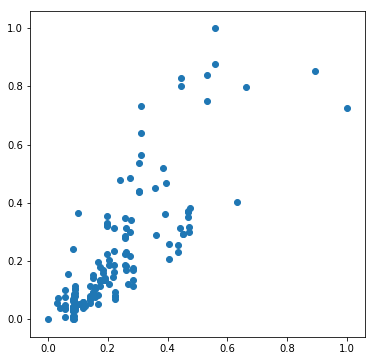

In [267]:
#defining a functionto vizualize these in pair plots
plt.figure(figsize=[6,6])
plt.scatter(car_master_train.horsepower, car_master_train.price)
plt.show()

### Model building

In [268]:
#taking X and Y set for model building
Y_train = car_master_train.pop('price')
X_train = car_master_train

#### Building linear model

In [269]:
import statsmodels.api as sm

#Adding a constant
X_train_lm = sm.add_constant(X_train[['horsepower']])

#creating first model
lr = sm.OLS(Y_train, X_train_lm).fit()

C:\Users\home\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [272]:
# Create a dataframe with all variables
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
print(vif['Features'])
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

0         const
1    horsepower
Name: Features, dtype: object


,Features,VIF
0,const,2.9
1,horsepower,1.0


In [271]:
print(lr.params)

const        -0.019484
horsepower    1.050556
dtype: float64


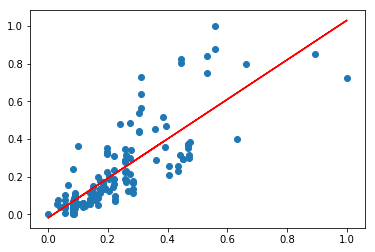

In [201]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], Y_train)
plt.plot(X_train_lm.iloc[:, 1], -0.019 + 1.050*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [202]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     261.8
Date:                Tue, 28 May 2019   Prob (F-statistic):           6.04e-34
Time:                        00:09:56   Log-Likelihood:                 91.997
No. Observations:                 143   AIC:                            -180.0
Df Residuals:                     141   BIC:                            -174.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0195      0.018     -1.068      0.2

##### adding another variable

In [274]:
# Assign another feature variables to X
X_train_lm = X_train[['horsepower', 'enginesize']]

In [206]:
# Build a linear model
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(Y_train, X_train_lm).fit()
lr.params

C:\Users\home\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const        -0.078951
horsepower    0.379117
enginesize    0.878745
dtype: float64

In [275]:
# Create a dataframe with all variables
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
print(vif['Features'])
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

0    horsepower
1    enginesize
Name: Features, dtype: object


,Features,VIF
0,horsepower,8.69
1,enginesize,8.69


In [208]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     250.1
Date:                Tue, 28 May 2019   Prob (F-statistic):           6.17e-47
Time:                        00:11:01   Log-Likelihood:                 125.63
No. Observations:                 143   AIC:                            -245.3
Df Residuals:                     140   BIC:                            -236.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0790      0.016     -4.981      0.0

In [218]:
#adding all feature variables to X
X_train_lm = X_train[['horsepower', 'enginesize','carwidth','horsepower']]

In [216]:
# Create a dataframe with all variables
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
print(vif['Features'])
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

0    horsepower
1    enginesize
2      carwidth
3    curbweight
4    horsepower
Name: Features, dtype: object


C:\Users\home\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,horsepower,inf
4,horsepower,inf
3,curbweight,34.34
2,carwidth,19.51
1,enginesize,18.14


In [122]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(Y_train, X_train_lm).fit()
lr.params

const        -0.158230
horsepower    0.141226
enginesize    0.486169
carwidth      0.207804
curbweight    0.245334
horsepower    0.141226
dtype: float64

In [123]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     164.3
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.91e-51
Time:                        23:53:56   Log-Likelihood:                 142.17
No. Observations:                 143   AIC:                            -274.3
Df Residuals:                     138   BIC:                            -259.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1582      0.021     -7.502      0.0

#### Adding all variables

In [125]:
#checking all columns in master dataset
car_master_train.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd',
       'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', '2bbl', '4bbl',
       'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [132]:
#car_master_train.info()
X_train.drop('mfi',1,inplace=True)

C:\Users\home\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [133]:
X_train.drop('spfi',1,inplace=True)

In [134]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(Y_train, X_train_lm.astype(float)).fit()
lr_1.params

C:\Users\home\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const               1.163744e-01
symboling          -7.980619e-03
fueltype            1.534445e-01
aspiration          8.437221e-02
doornumber          8.892072e-03
enginelocation      2.117161e-01
wheelbase           2.260465e-01
carlength          -1.272858e-01
carwidth            2.505098e-01
carheight          -1.699744e-01
curbweight          2.776565e-01
cylindernumber     -5.378536e-01
enginesize          1.392381e+00
boreratio          -3.294098e-01
stroke             -1.489780e-01
compressionratio   -4.053380e-01
horsepower         -1.670823e-01
peakrpm             2.075658e-01
citympg             7.071610e-02
highwaympg          9.100072e-02
audi               -2.758230e-02
bmw                 2.185695e-01
buick               2.415981e-02
chevrolet          -1.270467e-01
dodge              -1.544486e-01
honda              -1.077961e-01
isuzu              -6.589837e-02
jaguar             -5.334118e-02
mazda              -3.390531e-02
mercury             2.519080e-15
mitsubishi

In [135]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     54.97
Date:                Tue, 28 May 2019   Prob (F-statistic):           8.61e-50
Time:                        00:03:22   Log-Likelihood:                 270.60
No. Observations:                 143   AIC:                            -431.2
Df Residuals:                      88   BIC:                            -268.2
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1164      0.135  

In [136]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [137]:
# Create a dataframe with all variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\home\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\home\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1545: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,Features,VIF
1,fueltype,inf
49,ohcf,inf
54,idi,inf
4,enginelocation,inf
36,subaru,inf
11,enginesize,722.88
14,compressionratio,376.70
10,cylindernumber,353.98
18,highwaympg,236.29
17,citympg,233.14
